<a href="https://colab.research.google.com/github/luislucianozurdogmailcom/Analisis-Exploratorio-Terromoto-Nepal/blob/master/Trabajo_Pr%C3%A1ctico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_pre_terremoto  = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/train_values.csv');
df_post_terremoto = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/train_labels.csv'); 

df = pd.merge(df_pre_terremoto,df_post_terremoto,on = 'building_id')
df.info();
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:
grouped_place = df.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id']).agg({'roof_type':['count']})
level_0_place = grouped_place.columns.get_level_values(0)
level_1_place = grouped_place.columns.get_level_values(1)
grouped_place.columns = level_0_place + '_' + level_1_place
grouped_place.reset_index(inplace = True)
print(grouped_place.head(30))


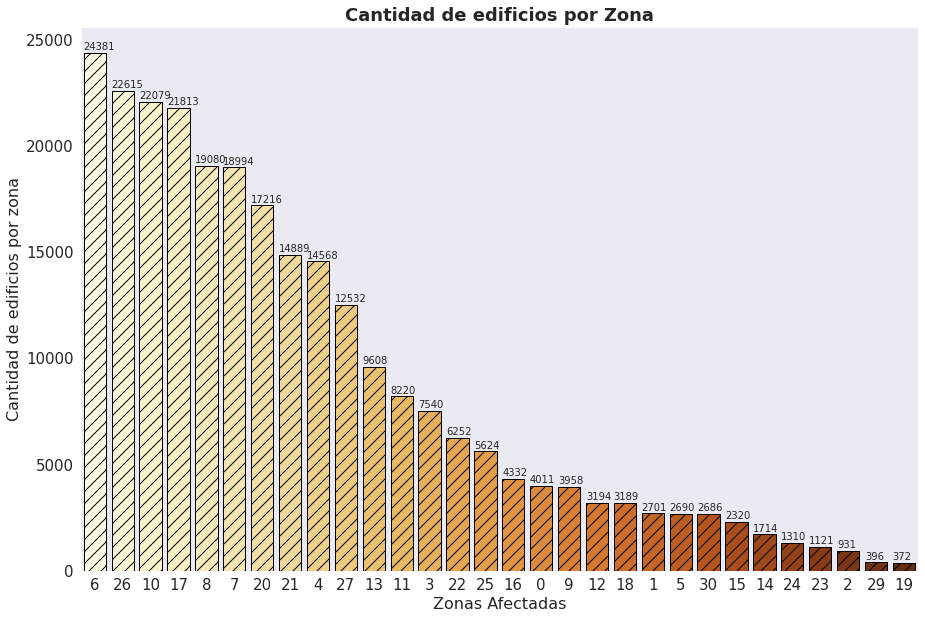

In [ ]:
# Cual es la Zona con mas edificios?

# Agrupamos por area y contamos la cantidad de edificios:
grouped_area         = df.groupby(['geo_level_1_id']).agg({'geo_level_3_id':['count']})
level_0_area         = grouped_area.columns.get_level_values(0)
level_1_area         = grouped_area.columns.get_level_values(1)
grouped_area.columns = level_0_area + '_' + level_1_area
grouped_area.reset_index(inplace = True)

top_10_areas_edificios = grouped_area.nlargest(30,'geo_level_3_id_count').values;

sectores  = [zonas[0] for zonas in top_10_areas_edificios]
edificios = [edificios[1] for edificios in top_10_areas_edificios]

#Grafico del Top 10
plt.figure(figsize = (15,10))
top_10_areas_edificios_df = grouped_area.nlargest(30,'geo_level_3_id_count');
sns.set_style('dark')
ax = sns.barplot(x = 'geo_level_1_id',
                 y = 'geo_level_3_id_count',
                 order = sectores ,edgecolor = 'black',
                 data = top_10_areas_edificios_df,
                 palette=('YlOrBr'), #rocket YlOrBr dark:salmon_r
                 hatch = '//')
ax.set_title('Cantidad de edificios por Zona',fontsize = 18,weight='bold')
ax.set_xlabel('Zonas Afectadas',fontsize = 16)
ax.set_ylabel('Cantidad de edificios por zona',fontsize = 16)
ax.tick_params(labelsize = 15)

for i,n in enumerate(edificios):
    plt.annotate(n,(i-0.40,n+500),fontsize=10,
                 arrowprops=dict(facecolor='green'),
                 horizontalalignment='left',verticalalignment='top')
    

In [ ]:
# Cual fue la zona general mas afectada hablando de edilicios?

# Agrupamos por area y daños recibidos, contamos la cantidad de edificios:

grouped_area_damage         = df.groupby(['geo_level_1_id','damage_grade'])\
    .agg({'geo_level_3_id':['count']})
level_0_area_damage         = grouped_area_damage.columns.get_level_values(0)
level_1_area_damage         = grouped_area_damage.columns.get_level_values(1)
grouped_area_damage.columns = level_0_area_damage + '_' + level_1_area_damage
grouped_area_damage.reset_index(inplace = True)

grouped_area_damage['porcentaje'] = grouped_area_damage['']

grouped_area_damage.info()
# Graficos
plt.figure(figsize=(15,10))
sns.set_style('dark')
ax2 = sns.barplot(x = 'geo_level_1_id',
                 y = 'geo_level_3_id_count',
                 order = sectores ,edgecolor = 'black',
                 data = grouped_area_damage[grouped_area_damage['damage_grade'] == 2],
                 palette=('YlOrBr'), #rocket YlOrBr dark:salmon_r
                 hatch = '-')
ax1 = sns.barplot(x = 'geo_level_1_id',
                 y = 'geo_level_3_id_count',
                 order = sectores ,edgecolor = 'black',
                 data = grouped_area_damage[grouped_area_damage['damage_grade'] == 3],
                 palette=('rocket'), #rocket YlOrBr dark:salmon_r
                 hatch = '-')
ax1 = sns.barplot(x = 'geo_level_1_id',
                 y = 'geo_level_3_id_count',
                 order = sectores ,edgecolor = 'black',
                 data = grouped_area_damage[grouped_area_damage['damage_grade'] == 1],
                 palette=('dark:salmon_r'), #rocket YlOrBr dark:salmon_r
                 hatch = '-')




ax1.set_title('Cantidad de edificios por Zona',fontsize = 18,weight='bold')
ax1.set_xlabel('Zonas Afectadas',fontsize = 16)
ax1.set_ylabel('Cantidad de edificios por zona',fontsize = 16)
ax1.tick_params(labelsize = 15)

preguntas:

1) Donde vibró mas el sismo.

2) Nivel socioeconomico de las familias.

3) Cantidades de habitacion.

4) Si se podria haber evitado.

5) Cantidad de familias que quedaron sin casa.

6) Dada la zona, que tipos de edificacion predomina.

7) Dada la zona, que clase de materiales predominan en las construcciones.

8) Relacion entre cantidad densidad de personas por vivienda y materiales.

9) Relacion entre los daños en las estructuras y los materiales 


In [104]:
# 9) Relacion entre los daños en las estructuras y los materiales

grouped_materiales_daño = df.groupby(
    ['has_superstructure_adobe_mud',              # Barro
     'has_superstructure_mud_mortar_stone',       # Barro/piedra
     'has_superstructure_stone_flag',             # Piedra
     'has_superstructure_cement_mortar_stone',    # Cemento - piedra
     'has_superstructure_mud_mortar_brick',       # Barro - ladrillos.
     'has_superstructure_cement_mortar_brick',    # Cemento - ladrillos.
     'has_superstructure_timber',                 # Madera de construccion
     'has_superstructure_bamboo',                 # Bambú
     'has_superstructure_rc_non_engineered',      # Concreto reforzado no-diseñado.
     'has_superstructure_rc_engineered',          # Concreto reforzado diseñado.
     'has_superstructure_other',                  # Construida con otro material.
     'damage_grade']).agg({'geo_level_3_id':['count']})
level_0_materiales_daño         = grouped_materiales_daño.columns.get_level_values(0)
level_1_materiales_daño         = grouped_materiales_daño.columns.get_level_values(1)
grouped_materiales_daño.columns = level_0_materiales_daño + '_' + level_1_materiales_daño
grouped_materiales_daño.reset_index(inplace = True)

# Agrupados
barro            = grouped_materiales_daño.groupby(['has_superstructure_adobe_mud','damage_grade']).agg({'geo_level_3_id_count':['sum']})
barro_piedra     = grouped_materiales_daño.groupby(['has_superstructure_mud_mortar_stone','damage_grade']).agg({'geo_level_3_id_count':['sum']})
piedra           = grouped_materiales_daño.groupby(['has_superstructure_stone_flag','damage_grade']).agg({'geo_level_3_id_count':['sum']})
cemento_piedra   = grouped_materiales_daño.groupby(['has_superstructure_cement_mortar_stone','damage_grade']).agg({'geo_level_3_id_count':['sum']})
barro_ladrillo   = grouped_materiales_daño.groupby(['has_superstructure_mud_mortar_brick','damage_grade']).agg({'geo_level_3_id_count':['sum']})
cemento_ladrillo = grouped_materiales_daño.groupby(['has_superstructure_cement_mortar_brick','damage_grade']).agg({'geo_level_3_id_count':['sum']})
madera           = grouped_materiales_daño.groupby(['has_superstructure_timber','damage_grade']).agg({'geo_level_3_id_count':['sum']})
bambu            = grouped_materiales_daño.groupby(['has_superstructure_bamboo','damage_grade']).agg({'geo_level_3_id_count':['sum']})
concreto_no_dis  = grouped_materiales_daño.groupby(['has_superstructure_rc_non_engineered','damage_grade']).agg({'geo_level_3_id_count':['sum']})
concreto_dis     = grouped_materiales_daño.groupby(['has_superstructure_rc_engineered','damage_grade']).agg({'geo_level_3_id_count':['sum']})
otro_mat         = grouped_materiales_daño.groupby(['has_superstructure_other','damage_grade']).agg({'geo_level_3_id_count':['sum']})

barro            = barro['geo_level_3_id_count','sum'].values[3:]
barro_piedra     = barro_piedra['geo_level_3_id_count','sum'].values[3:]
piedra           = piedra['geo_level_3_id_count','sum'].values[3:]
cemento_piedra   = cemento_piedra['geo_level_3_id_count','sum'].values[3:]
barro_ladrillo   = barro_ladrillo['geo_level_3_id_count','sum'].values[3:]
cemento_ladrillo = cemento_ladrillo['geo_level_3_id_count','sum'].values[3:]
madera           = madera['geo_level_3_id_count','sum'].values[3:]
bambu            = bambu['geo_level_3_id_count','sum'].values[3:]
concreto_no_dis  = concreto_no_dis['geo_level_3_id_count','sum'].values[3:]
concreto_dis     = concreto_dis['geo_level_3_id_count','sum'].values[3:]
otro_mat         = otro_mat['geo_level_3_id_count','sum'].values[3:]

materiales = [[barro,'barro'],
              [barro_piedra,'barro y piedra'],
              [piedra,'piedra'],
              [cemento_piedra,'cemento y piedra'],
              [barro_ladrillo,'barro y ladrillo'],
              [cemento_ladrillo,'cemento y ladrillo'],
              [madera,'madera'],
              [bambu,'bambu'],
              [concreto_no_dis,'concreto no diseñado'],
              [concreto_dis,'concreto diseñado'],
              [otro_mat,'otros materiales']]
# Los datos presentan mezclas entre sí, con lo cual tenemos una relación a explorar.

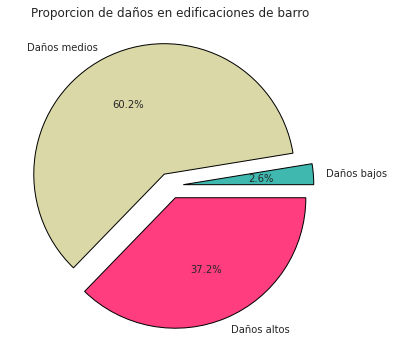

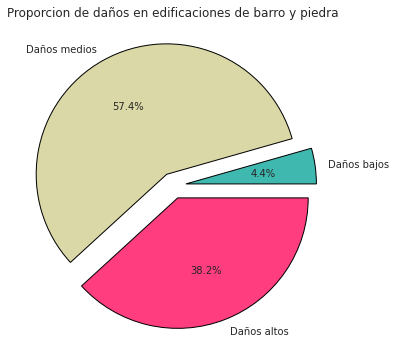

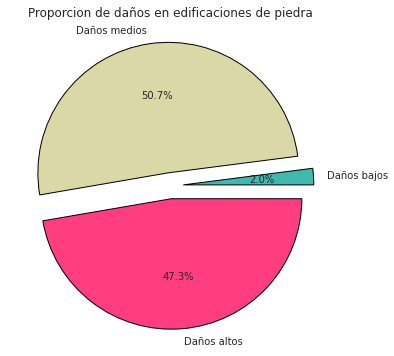

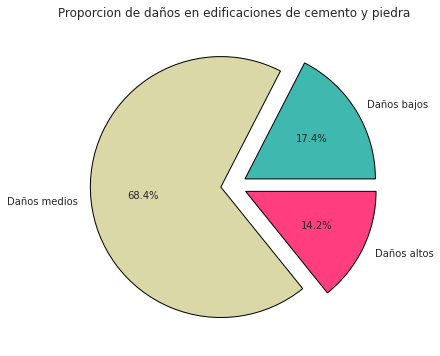

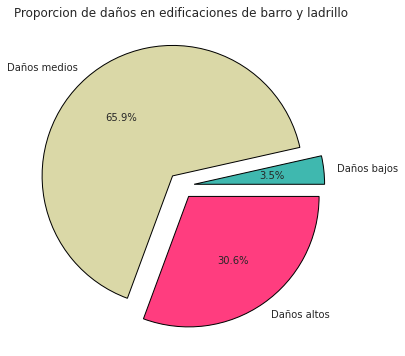

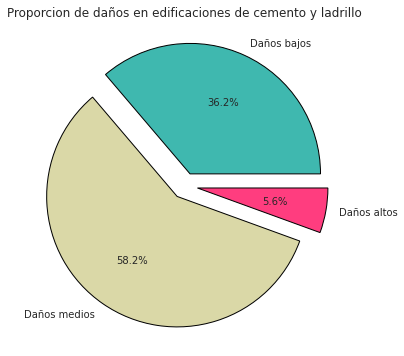

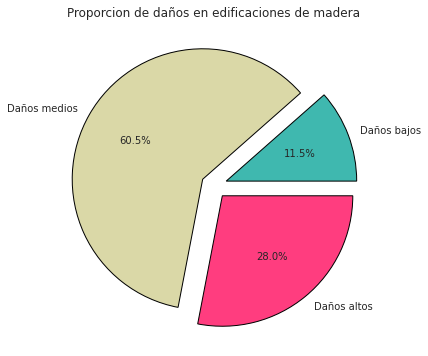

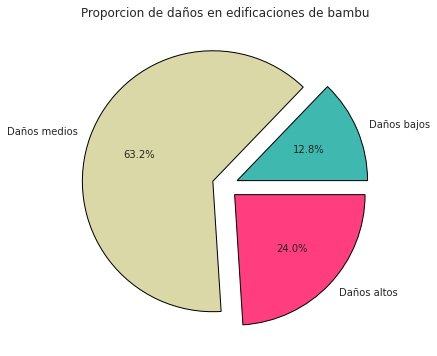

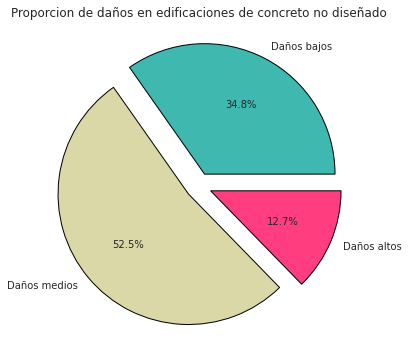

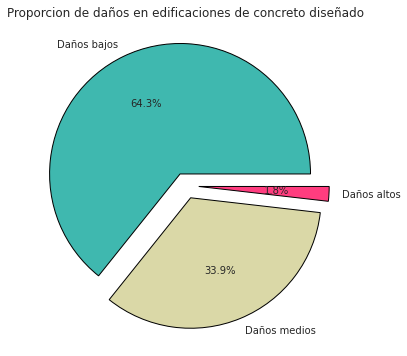

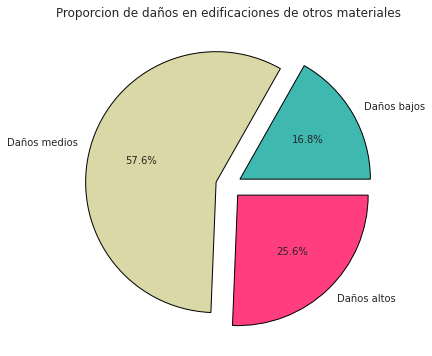

In [105]:
for i in materiales:

  valores         = i[0];
  valores_nombres = ['Daños bajos','Daños medios','Daños altos']

  # Grupo Barro grafico
  plt.figure(figsize=(6,6));
  pie = plt.pie(valores,
          labels = valores_nombres,
          labeldistance = 1.1,
          wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black'},
          colors = ['#3FB8AF','#DAD8A7','#FF3D7F'],
          autopct='%1.1f%%',
          explode = [0.1,0.1,0.1])
  titulo = 'Proporcion de daños en edificaciones de ' + i[1];
  plt.title(titulo)
  plt.show()

preguntas:

1) Donde vibró mas el sismo.

2) Nivel socioeconomico de las familias.

3) Cantidades de habitacion.

4) Si se podria haber evitado.

5) Cantidad de familias que quedaron sin casa.

6) Dada la zona, que tipos de edificacion predomina.

7) Dada la zona, que clase de materiales predominan en las construcciones.

8) Relacion entre cantidad densidad de personas por vivienda y materiales.

9) Relacion entre los daños en las estructuras y los materiales    **...Hecho...**


In [ ]:
# 8) Relación entre cantidad de personas por vivienda y materiales

# Selecciono materiales, familias, area y daños
grouped_materiales_familias_daño = df.groupby(
    ['has_superstructure_adobe_mud',              # Barro
     'has_superstructure_mud_mortar_stone',       # Barro/piedra
     'has_superstructure_stone_flag',             # Piedra
     'has_superstructure_cement_mortar_stone',    # Cemento - piedra
     'has_superstructure_mud_mortar_brick',       # Barro - ladrillos.
     'has_superstructure_cement_mortar_brick',    # Cemento - ladrillos.
     'has_superstructure_timber',                 # Madera de construccion
     'has_superstructure_bamboo',                 # Bambú
     'has_superstructure_rc_non_engineered',      # Concreto reforzado no-diseñado.
     'has_superstructure_rc_engineered',          # Concreto reforzado diseñado.
     'has_superstructure_other',                  # Construida con otro material.
     'count_families',                            # Cuantas familias vivian allí
     'count_floors_pre_eq',                       # Cantidad de pisos de la edificacion
     'area_percentage',
     'damage_grade']).agg({'geo_level_3_id':['count']})
level_0_materiales_familias_daño         = grouped_materiales_familias_daño.columns.get_level_values(0)
level_1_materiales_familias_daño         = grouped_materiales_familias_daño.columns.get_level_values(1)
grouped_materiales_familias_daño.columns = level_0_materiales_familias_daño + '_' + level_1_materiales_familias_daño
grouped_materiales_familias_daño.reset_index(inplace = True)

# Selecciono las que no tienen concreto, concreto y ladrillo y concreto diseñado.
grouped_barro_piedra_bambu_ladrillos_madera_familias = grouped_materiales_familias_daño[
                                                          (grouped_materiales_familias_daño['has_superstructure_cement_mortar_stone'] == 0)&
                                                          (grouped_materiales_familias_daño['has_superstructure_cement_mortar_brick'] == 0)&
                                                          (grouped_materiales_familias_daño['has_superstructure_rc_non_engineered'] == 0)&
                                                          (grouped_materiales_familias_daño['has_superstructure_rc_engineered'] == 0)&
                                                          (grouped_materiales_familias_daño['count_families'] >= 1)][['count_families',
                                                                                                                      'area_percentage',
                                                                                                                      'damage_grade',
                                                                                                                      'geo_level_3_id_count',
                                                                                                                      'count_floors_pre_eq']]

# Calculo la densidad poblacional de cada edificio como n°familias / (Area * Pisos). 
grouped_barro_piedra_bambu_ladrillos_madera_familias['densidad_poblacional'] = 1/(grouped_barro_piedra_bambu_ladrillos_madera_familias['count_families']\
/(grouped_barro_piedra_bambu_ladrillos_madera_familias['area_percentage']*grouped_barro_piedra_bambu_ladrillos_madera_familias['count_floors_pre_eq']))

# Me quedo con repeticiones, densidad poblacional y grado de daño
grouped_barro_piedra_bambu_ladrillos_madera_familias = grouped_barro_piedra_bambu_ladrillos_madera_familias[['damage_grade','densidad_poblacional','geo_level_3_id_count']]

# Agrupo por misma densidad poblacional, grado de daño y sumo repeticiones
grouped_barro_piedra_bambu_ladrillos_madera_familias = grouped_barro_piedra_bambu_ladrillos_madera_familias.groupby(
    ['densidad_poblacional',
     'damage_grade']).agg({'geo_level_3_id_count':['sum']})
level_0         = grouped_barro_piedra_bambu_ladrillos_madera_familias.columns.get_level_values(0)
level_1         = grouped_barro_piedra_bambu_ladrillos_madera_familias.columns.get_level_values(1)
grouped_barro_piedra_bambu_ladrillos_madera_familias.columns = level_0 + '_' + level_1
grouped_barro_piedra_bambu_ladrillos_madera_familias.reset_index(inplace = True)

#Cambio el nombre de la columna 'geo_level_3_id_count_sum' a cantidad
grouped_barro_piedra_bambu_ladrillos_madera_familias.rename(columns={'geo_level_3_id_count_sum' : 'cantidad',
                                                                     'damage_grade' : 'Grado de daño'},inplace=True)


Text(0.5, 1.0, 'Frecuencia de edificaciones por densidad de familias para cada tipo de daño y para materiales de baja resistencia')

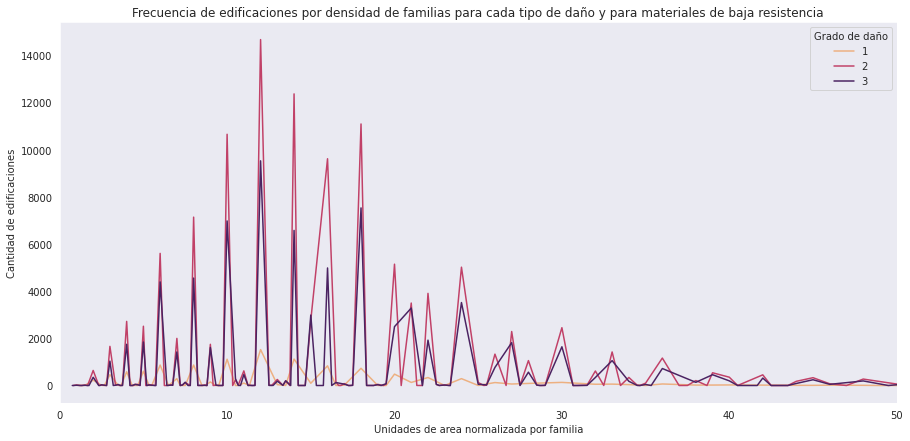

In [ ]:
# Grafica 
#sns.set_theme(style="whitegrid")

sns.set_style("dark")
plt.figure(figsize=(15,7));
plt.xlim(right = 50);

plt.xlabel("Unidades de area normalizada por familia")
plt.ylabel("Cantidad de edificaciones")
# Plot the distribution of clarity ratings, conditional on carat
figure = sns.lineplot(data=grouped_barro_piedra_bambu_ladrillos_madera_familias,
             x="densidad_poblacional",
             y="cantidad",
             hue="Grado de daño",
             #style="damage_grade",
             palette="flare",
             #size="damage_grade",
             legend="full")
figure.set_title('Frecuencia de edificaciones por densidad de familias para cada tipo de daño y para materiales de baja resistencia')

In [ ]:
# Selecciono las que tienen concreto, concreto y ladrillo y concreto diseñado.
grouped_materiales_alta_resistencia_familias = grouped_materiales_familias_daño[
                                                          (grouped_materiales_familias_daño['has_superstructure_adobe_mud'] == 0)&
                                                          (grouped_materiales_familias_daño['has_superstructure_mud_mortar_stone'] == 0)&
                                                          (grouped_materiales_familias_daño['has_superstructure_stone_flag'] == 0)&
                                                          (grouped_materiales_familias_daño['has_superstructure_cement_mortar_stone'] == 0)&
                                                          (grouped_materiales_familias_daño['has_superstructure_mud_mortar_brick'] == 0)&
                                                          (grouped_materiales_familias_daño['has_superstructure_timber'] == 0)&
                                                          (grouped_materiales_familias_daño['has_superstructure_bamboo'] == 0)&
                                                          (grouped_materiales_familias_daño['has_superstructure_other'] == 0)&
                                                          (grouped_materiales_familias_daño['count_families'] >= 1)][['count_families',
                                                                                                                      'area_percentage',
                                                                                                                      'damage_grade',
                                                                                                                      'geo_level_3_id_count',
                                                                                                                      'count_floors_pre_eq']]

# Calculo la densidad poblacional de cada edificio como n°familias / (Area * Pisos). 
grouped_materiales_alta_resistencia_familias['densidad_poblacional'] = 1/(grouped_materiales_alta_resistencia_familias['count_families']\
/(grouped_materiales_alta_resistencia_familias['area_percentage']*grouped_materiales_alta_resistencia_familias['count_floors_pre_eq']))

# Me quedo con repeticiones, densidad poblacional y grado de daño
grouped_materiales_alta_resistencia_familias = grouped_materiales_alta_resistencia_familias[['damage_grade','densidad_poblacional','geo_level_3_id_count']]

# Agrupo por misma densidad poblacional, grado de daño y sumo repeticiones
grouped_materiales_alta_resistencia_familias = grouped_materiales_alta_resistencia_familias.groupby(
    ['densidad_poblacional',
     'damage_grade']).agg({'geo_level_3_id_count':['sum']})
level_0         = grouped_materiales_alta_resistencia_familias.columns.get_level_values(0)
level_1         = grouped_materiales_alta_resistencia_familias.columns.get_level_values(1)
grouped_materiales_alta_resistencia_familias.columns = level_0 + '_' + level_1
grouped_materiales_alta_resistencia_familias.reset_index(inplace = True)

#Cambio el nombre de la columna 'geo_level_3_id_count_sum' a cantidad
grouped_materiales_alta_resistencia_familias.rename(columns={'geo_level_3_id_count_sum' : 'cantidad',
                                                             'damage_grade' : 'Grado de daño'},inplace=True)

Text(0.5, 1.0, 'Frecuencia de edificaciones por densidad de familias para cada tipo de daño y para materiales de alta resistencia')

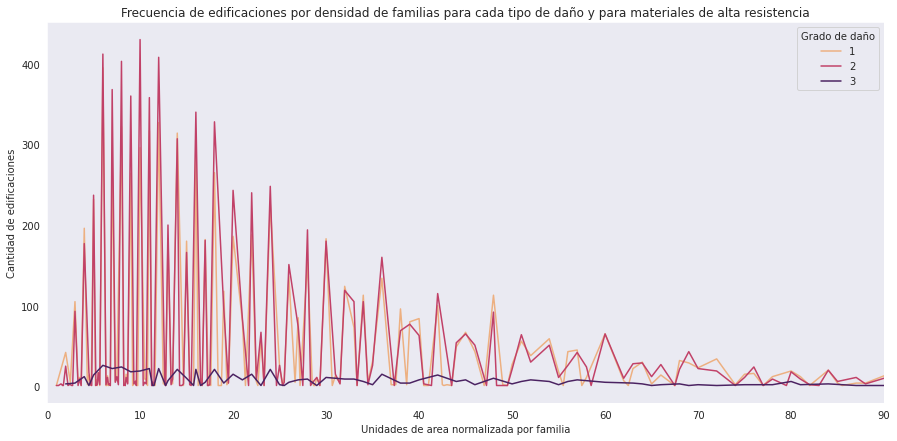

In [ ]:
# Grafica 
#sns.set_theme(style="whitegrid")

sns.set_style("dark")
plt.figure(figsize=(15,7));
plt.xlim(right = 90);

plt.xlabel("Unidades de area normalizada por familia")
plt.ylabel("Cantidad de edificaciones")
# Plot the distribution of clarity ratings, conditional on carat
figure = sns.lineplot(data=grouped_materiales_alta_resistencia_familias,
             x="densidad_poblacional",
             y="cantidad",
             hue="Grado de daño",
             #style="damage_grade",
             palette="flare",
             #size="damage_grade",
             legend="full")
figure.set_title('Frecuencia de edificaciones por densidad de familias para cada tipo de daño y para materiales de alta resistencia')

In [ ]:
# Bonus track, Estadistica para conocer mejor la distribucion de densidades por edificacion

# agrupamos por familias, pisos y area
grouped_familias_pisos_area = df.groupby(['count_floors_pre_eq','area_percentage','count_families']).agg({'age' : ['count']})
level_0 = grouped_familias_pisos_area.columns.get_level_values(0)
level_1 = grouped_familias_pisos_area.columns.get_level_values(1)
grouped_familias_pisos_area.columns = level_0 + "_" + level_1
grouped_familias_pisos_area.reset_index(inplace=True)

# Filtramos los datos, tienen que vivir personas en las edificaciones
grouped_familias_pisos_area = grouped_familias_pisos_area[grouped_familias_pisos_area['count_families'] > 0]

# Cambiamos el nombre de la columna age_count a cantidad de edificios
grouped_familias_pisos_area.rename(columns={'age_count' : 'Cantidad de edificios'},
                                   inplace = True)
# Agrego la columna densidad
grouped_familias_pisos_area['Densidad'] = 1/(grouped_familias_pisos_area['count_families']\
/(grouped_familias_pisos_area['area_percentage']*grouped_familias_pisos_area['count_floors_pre_eq']))

grouped_familias_pisos_area = grouped_familias_pisos_area[['Densidad','Cantidad de edificios']]

# Hago el proceso de concentrar todos los valores a densidades entre saltos de 0.5 en 0.5
discretizacion = 0.5
rangos = [grouped_familias_pisos_area[(grouped_familias_pisos_area['Densidad'] < discretizacion*i)&
                                      (grouped_familias_pisos_area['Densidad'] >= discretizacion*(i-1))] for i in range(1,190)]

grouped_familias_pisos_area = []
for k,dataframes in enumerate(rangos):
  dataframes['Cantidad de edificios']     = dataframes['Cantidad de edificios'].sum()
  dataframes['Densidad']                  = discretizacion*(k+1)
  grouped_familias_pisos_area.append(dataframes.head(1))

grouped_familias_pisos_area = pd.concat(grouped_familias_pisos_area,axis = 0)

Text(0.5, 1.0, 'Frecuencia de edificaciones por densidad de familias')

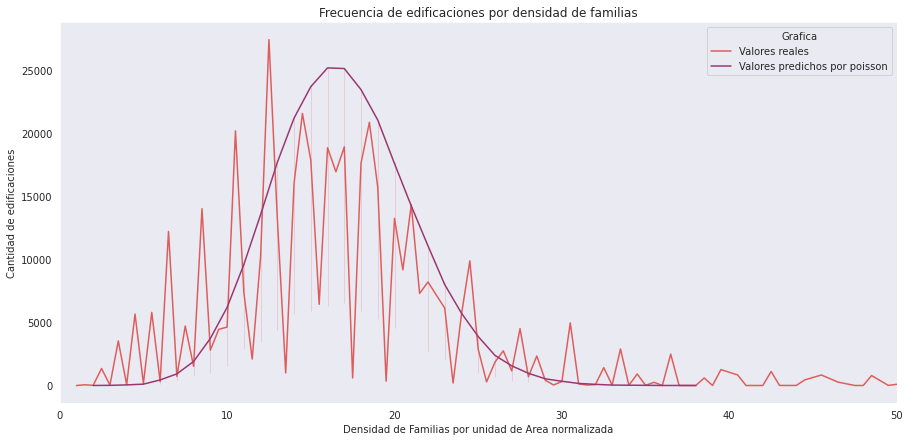

In [ ]:
# Grafica 
from scipy.stats import poisson

#Calculamos parametros de poisson para comparar la distribución del dataframe y la fabricada
media = grouped_familias_pisos_area['Densidad']*grouped_familias_pisos_area['Cantidad de edificios']
media = media.sum()/grouped_familias_pisos_area['Cantidad de edificios'].sum()

# Inventamos una distribucion de poisson con el parámetro media
distribución_poisson = pd.DataFrame(data = {'Densidad' : np.array(poisson.rvs(media,size = 260600))})
distribución_poisson['Cantidad de edificios'] = 1;
distribución_poisson = distribución_poisson.groupby(['Densidad']).agg({'Cantidad de edificios' : ['count']})
level_0 = distribución_poisson.columns.get_level_values(0)
level_1 = distribución_poisson.columns.get_level_values(1)
distribución_poisson.columns = level_0
distribución_poisson.reset_index(inplace=True)

# Juntamos los valores
grouped_familias_pisos_area['Grafica'] = 'Valores reales'
distribución_poisson['Grafica']        = 'Valores predichos por poisson'
distribución_poisson.set_index(pd.Index(range(500000,500000 + distribución_poisson.shape[0])))
grouped_familias_pisos_area            = pd.concat([grouped_familias_pisos_area,
                                                distribución_poisson], axis = 0)



sns.set_style("dark")
plt.figure(figsize=(15,7));
plt.xlim(right = 50);

plt.xlabel("Densidad de Familias por unidad de Area normalizada")
plt.ylabel("Cantidad de edificaciones")
# Plot the distribution of clarity ratings, conditional on carat
figure = sns.lineplot(#data=grouped_familias_pisos_area,
             data = grouped_familias_pisos_area,
             x="Densidad",
             y="Cantidad de edificios",
             hue = 'Grafica',
             palette="flare")
figure.set_title('Frecuencia de edificaciones por densidad de familias')


preguntas:

1) Donde vibró mas el sismo.

2) Nivel socioeconomico de las familias.

3) Cantidades de habitacion.

4) Si se podria haber evitado.

5) Cantidad de familias que quedaron sin casa.

6) Dada la zona, que tipos de edificacion predomina.

7) Dada la zona, que clase de materiales predominan en las construcciones.

8) Relacion entre cantidad densidad de personas por vivienda y materiales. **...Hecho...**

9) Relacion entre los daños en las estructuras y los materiales    **...Hecho...**


In [ ]:
# Creo la funcion para fabricar la columna materiales

def crear_columna_materiales(dataframe):
  dataframe['Materiales'] = ""

  for i in dataframe.index:

    if (dataframe.loc[i][['has_superstructure_adobe_mud']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Barro" + " | " + dataframe.loc[i][['Materiales']].values[0]

    if (dataframe.loc[i][['has_superstructure_mud_mortar_stone']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Barro y piedra" + " | " + dataframe.loc[i][['Materiales']].values[0]

    if (dataframe.loc[i][['has_superstructure_stone_flag']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Piedra" + " | " + dataframe.loc[i][['Materiales']].values[0]

    if (dataframe.loc[i][['has_superstructure_cement_mortar_stone']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Cemento y piedra" + " | " + dataframe.loc[i][['Materiales']].values[0]

    if (dataframe.loc[i][['has_superstructure_mud_mortar_brick']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Barro y ladrillos" + " | " + dataframe.loc[i][['Materiales']].values[0]

    if (dataframe.loc[i][['has_superstructure_cement_mortar_brick']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Cemento y ladrillos" + " | " + dataframe.loc[i][['Materiales']].values[0]

    if (dataframe.loc[i][['has_superstructure_timber']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Madera de construccion" + " | " + dataframe.loc[i][['Materiales']].values[0]

    if (dataframe.loc[i][['has_superstructure_bamboo']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Bambu" + " | " + dataframe.loc[i][['Materiales']].values[0]

    if (dataframe.loc[i][['has_superstructure_rc_non_engineered']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Concreto reforzado no diseñado" + " | " + dataframe.loc[i][['Materiales']].values[0]
  
    if (dataframe.loc[i][['has_superstructure_rc_engineered']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Concreto reforzado diseñado" + " | " + dataframe.loc[i][['Materiales']].values[0]
    
    if (dataframe.loc[i][['has_superstructure_other']].values[0] == 1): #
      dataframe.loc[i,'Materiales'] = "Otro material" + " | " + dataframe.loc[i][['Materiales']].values[0]


In [ ]:
# 7) Dada la zona, que clase de materiales predominan en las construcciones.

# Juntamos por zonas y materiales de construccion

grouped_materiales_zonas = df.groupby(
    ['has_superstructure_adobe_mud',              # Barro
     'has_superstructure_mud_mortar_stone',       # Barro/piedra
     'has_superstructure_stone_flag',             # Piedra
     'has_superstructure_cement_mortar_stone',    # Cemento - piedra
     'has_superstructure_mud_mortar_brick',       # Barro - ladrillos.
     'has_superstructure_cement_mortar_brick',    # Cemento - ladrillos.
     'has_superstructure_timber',                 # Madera de construccion
     'has_superstructure_bamboo',                 # Bambú
     'has_superstructure_rc_non_engineered',      # Concreto reforzado no-diseñado.
     'has_superstructure_rc_engineered',          # Concreto reforzado diseñado.
     'has_superstructure_other',                  # Construida con otro material.
     'geo_level_1_id'                             # Area General
     ]).agg({'geo_level_3_id':['count']})

# Reseteo el formato del dataframe
level_0 = grouped_materiales_zonas.columns.get_level_values(0)
level_1 = grouped_materiales_zonas.columns.get_level_values(1)
grouped_materiales_zonas.columns = level_0 + '_' + level_1
grouped_materiales_zonas.reset_index(inplace = True)

# Cambio el nombre de la columna geo level
grouped_materiales_zonas.rename(columns={'geo_level_3_id_count' : 'Cantidad',
                                         'geo_level_1_id' : 'Zonas'},inplace=True)

# Buscamos los mas grandes para cada material de construccion por zona
grouped_materiales_zonas_maximos = [grouped_materiales_zonas[grouped_materiales_zonas['Zonas'] == i].nlargest(2,columns = 'Cantidad') for i in range(1,31)]

# Sumo todos los valores de la lista para volver a formar un DF
grouped_materiales_zonas_maximos = pd.concat(grouped_materiales_zonas_maximos,axis=0)


# Creo la columna materiales en grouped_materiales_zonas_maximos y grouped_materiales_zonas
# y descarto la demas información

crear_columna_materiales(grouped_materiales_zonas_maximos)
crear_columna_materiales(grouped_materiales_zonas) # Operación costosa

grouped_materiales_zonas_maximos = grouped_materiales_zonas_maximos[['Zonas','Cantidad','Materiales']]
grouped_materiales_zonas         = grouped_materiales_zonas[['Zonas','Cantidad','Materiales']]


[Text(0.5, 0, 'Bambu | Madera de construccion | '),
 Text(1.5, 0, 'Bambu | Madera de construccion | Barro y piedra | '),
 Text(2.5, 0, 'Barro y ladrillos | '),
 Text(3.5, 0, 'Barro y ladrillos | Barro | '),
 Text(4.5, 0, 'Barro y piedra | '),
 Text(5.5, 0, 'Barro | '),
 Text(6.5, 0, 'Cemento y ladrillos | '),
 Text(7.5, 0, 'Madera de construccion | Barro y piedra | '),
 Text(8.5, 0, 'Madera de construccion | Piedra | '),
 Text(9.5, 0, 'Madera de construccion | Piedra | Barro y piedra | ')]

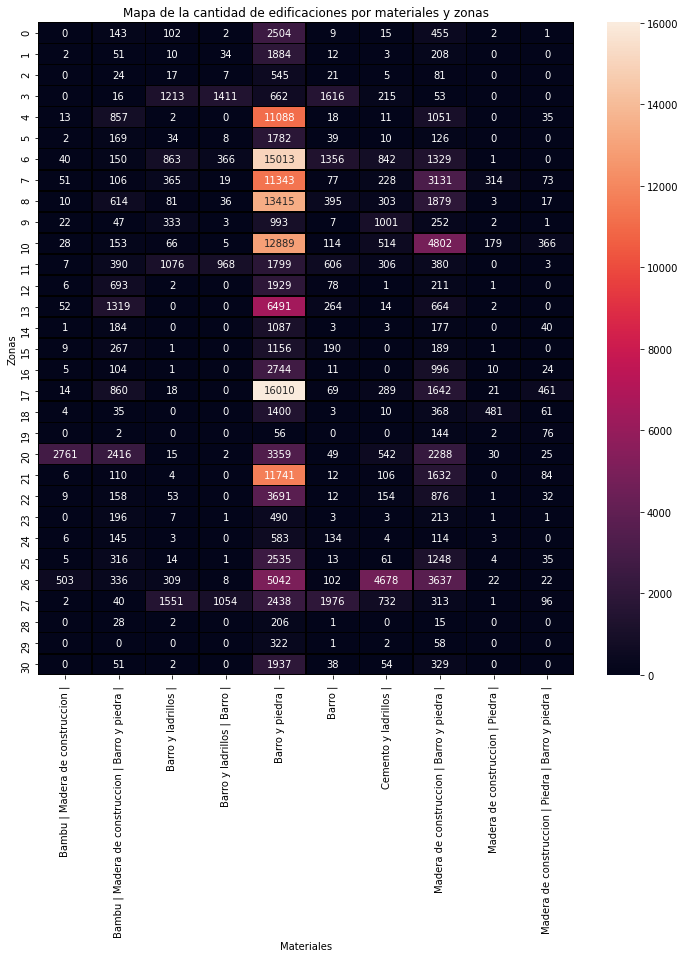

In [ ]:
# Pivotamos la informacion para hacer el heat map

pivotado          = grouped_materiales_zonas_maximos.pivot("Zonas", "Materiales", "Cantidad")
claves_de_maximos = pivotado.columns.values
pivotado_final    = grouped_materiales_zonas[(grouped_materiales_zonas['Materiales'] == claves_de_maximos[0]) |
                                             (grouped_materiales_zonas['Materiales'] == claves_de_maximos[1]) |
                                             (grouped_materiales_zonas['Materiales'] == claves_de_maximos[2]) |
                                             (grouped_materiales_zonas['Materiales'] == claves_de_maximos[3]) |
                                             (grouped_materiales_zonas['Materiales'] == claves_de_maximos[4]) |
                                             (grouped_materiales_zonas['Materiales'] == claves_de_maximos[5]) |
                                             (grouped_materiales_zonas['Materiales'] == claves_de_maximos[6]) |
                                             (grouped_materiales_zonas['Materiales'] == claves_de_maximos[7]) |
                                             (grouped_materiales_zonas['Materiales'] == claves_de_maximos[8]) |
                                             (grouped_materiales_zonas['Materiales'] == claves_de_maximos[9]) ]\
                                             .pivot("Zonas", "Materiales", "Cantidad")
pivotado_final.fillna(0,inplace=True)

# Draw a heatmap with the numeric values in each cell
f, ax  = plt.subplots(figsize=(12, 12))
figura = sns.heatmap(pivotado_final,
            annot=True,
            fmt='g',
            linewidths=.5,
            ax=ax,
            linecolor = 'black')
figura.set_title('Mapa de la cantidad de edificaciones por materiales y zonas')
figura.set_xticklabels(figura.get_xticklabels(),rotation = 90)



preguntas:

1) Donde vibró mas el sismo.

2) Nivel socioeconomico de las familias.

3) Cantidades de habitacion.

4) Si se podria haber evitado.

5) Cantidad de familias que quedaron sin casa.

6) Dada la zona, que tipos de edificacion predomina.

7) Dada la zona, que clase de materiales predominan en las construcciones. **...Hecho...**

8) Relacion entre cantidad densidad de personas por vivienda y materiales. **...Hecho...**

9) Relacion entre los daños en las estructuras y los materiales    **...Hecho...**


In [ ]:
# 6) Dada la zona que tipos de edificacion predomina y cuales sufrieron mayores daños.

# Agrupo por años, altura, area, pisos, tipos de techo, tipo de cimientos,
# tipo de construccion en planta baja y tipo de construccion en demas pisos 
grouped_tipos_de_edificaciones = df.groupby(['count_floors_pre_eq',
                                             'age',
                                             'area_percentage',
                                             'height_percentage',
                                             'land_surface_condition',
                                             'foundation_type',
                                             'roof_type',
                                             'ground_floor_type',
                                             'other_floor_type',
                                             'plan_configuration',
                                             'damage_grade']).agg({'geo_level_3_id' : ['count']})
level_0 = grouped_tipos_de_edificaciones.columns.get_level_values(0)
level_1 = grouped_tipos_de_edificaciones.columns.get_level_values(1)
grouped_tipos_de_edificaciones.columns = level_0 + "_" + level_1
grouped_tipos_de_edificaciones.reset_index(inplace=True)



In [ ]:
# Vamos a responder a la pregunta de a partes, primero por edad y daños
# Filtro los edificios de mas de 300 años

grouped_daños_años = grouped_tipos_de_edificaciones[grouped_tipos_de_edificaciones['age']<500]
grouped_daños_años = grouped_daños_años[['age','damage_grade','geo_level_3_id_count']]

grouped_daños_años = grouped_daños_años.groupby(['age','damage_grade']).agg({'geo_level_3_id_count':['sum']})
level_0            = grouped_daños_años.columns.get_level_values(0)
level_1            = grouped_daños_años.columns.get_level_values(1)
grouped_daños_años.columns = level_0 + "_" + level_1
grouped_daños_años.reset_index(inplace = True)
grouped_daños_años.rename(columns={'geo_level_3_id_count_sum' : 'Cantidad',
                                   'age' : 'Edad',
                                   'damage_grade' : 'Grado de daño'},inplace=True)

grouped_daños_años = grouped_daños_años.pivot('Edad','Grado de daño','Cantidad')
grouped_daños_años.fillna(0,inplace=True)

grouped_daños_aux = grouped_daños_años.copy()
grouped_daños_años[1] = (grouped_daños_aux[1]/(grouped_daños_aux[1]+grouped_daños_aux[2]+grouped_daños_aux[3]))*100
grouped_daños_años[2] = (grouped_daños_aux[2]/(grouped_daños_aux[1]+grouped_daños_aux[2]+grouped_daños_aux[3]))*100
grouped_daños_años[3] = (grouped_daños_aux[3]/(grouped_daños_aux[1]+grouped_daños_aux[2]+grouped_daños_aux[3]))*100

Text(0.5, 1.0, 'Mapa de calor de Grado de daño por edad')

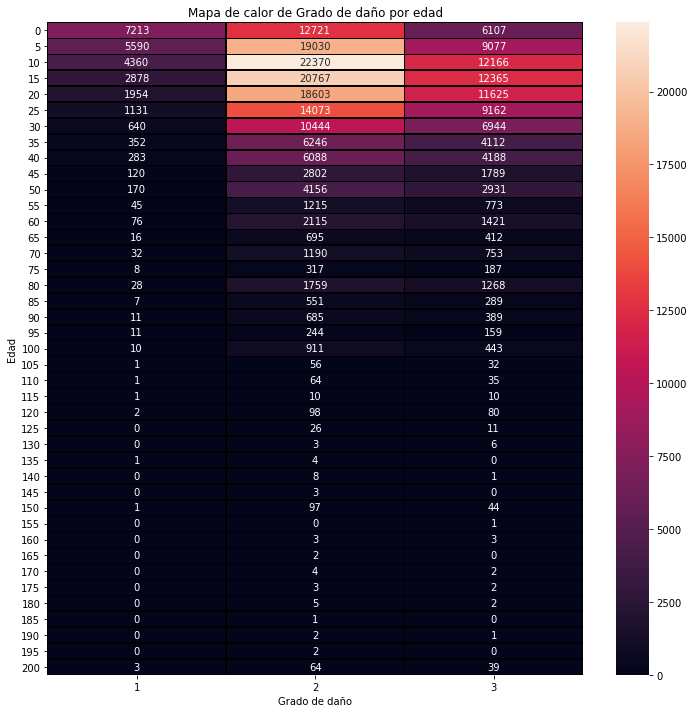

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
figura = sns.heatmap(grouped_daños_aux,linecolor='black', annot=True, fmt="g", linewidths=.5, ax=ax)
figura.set_title('Mapa de calor de Grado de daño por edad')

Text(0.5, 1.0, 'Mapa de calor de Grado de daño por edad en porcentaje')

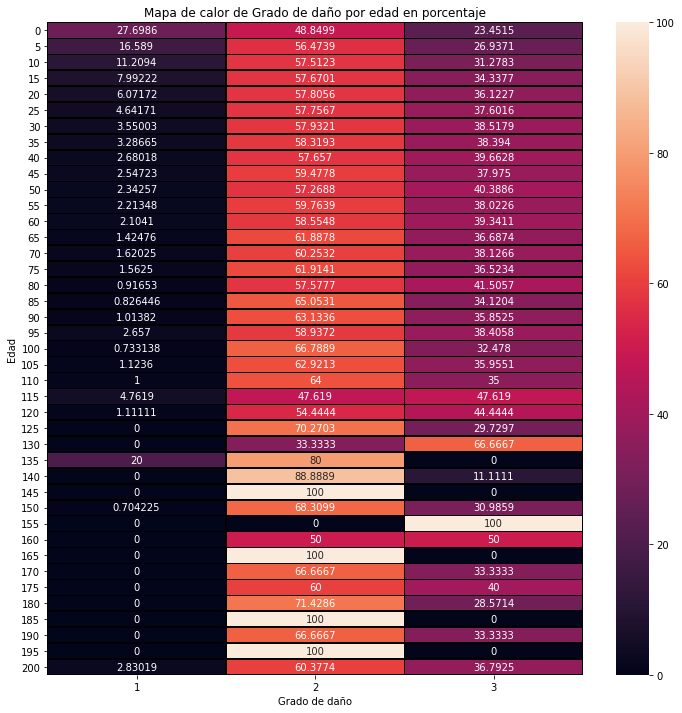

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
figura = sns.heatmap(grouped_daños_años,linecolor='black', annot=True, fmt="g", linewidths=.5, ax=ax)
figura.set_title('Mapa de calor de Grado de daño por edad en porcentaje')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Grafica de porcentajes de edificaciones por altura y tipo de daño')

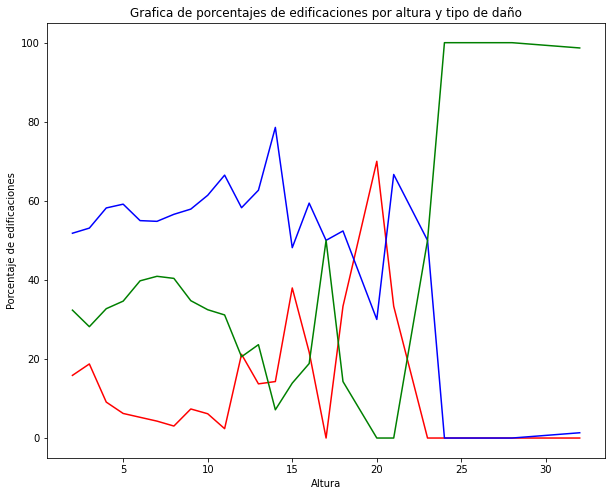

In [29]:
# Altura y daños
# Filtramos por un intervalo de area
df_filtrado     = df[df['area_percentage'] < 10]

# Agrupamos por daño y altura y contamos.
df_altura_daños = df_filtrado.groupby(['damage_grade','height_percentage']).agg({'age':['count']})
level_0         = df_altura_daños.columns.get_level_values(0)
level_1         = df_altura_daños.columns.get_level_values(1)
df_altura_daños.columns = level_0 + '_' + level_1
df_altura_daños.reset_index(inplace=True)

# Pivotamos
df_altura_daños_pivot = df_altura_daños.pivot('height_percentage','damage_grade','age_count').fillna(0)
df_altura_daños_pivot_aux = df_altura_daños_pivot.copy()

# Calculamos los porcentajes
df_altura_daños_pivot[1] = df_altura_daños_pivot_aux[1]/(df_altura_daños_pivot_aux[1]+df_altura_daños_pivot_aux[2]+df_altura_daños_pivot_aux[3])*100
df_altura_daños_pivot[2] = df_altura_daños_pivot_aux[2]/(df_altura_daños_pivot_aux[1]+df_altura_daños_pivot_aux[2]+df_altura_daños_pivot_aux[3])*100
df_altura_daños_pivot[3] = df_altura_daños_pivot_aux[3]/(df_altura_daños_pivot_aux[1]+df_altura_daños_pivot_aux[2]+df_altura_daños_pivot_aux[3])*100

# Reseteamos los indices
df_altura_daños_pivot['Altura'] = df_altura_daños_pivot.index

# Hacemos el grafico
plt.figure(figsize=(10,8))
colores = ['red','blue','green']
for i in range(1,4):
  ax = plt.subplot(1,1,1)
  ax.plot(df_altura_daños_pivot['Altura'],df_altura_daños_pivot[i],colores[i-1])
  ax.set_xlabel('Altura')
  ax.set_ylabel('Porcentaje de edificaciones')
  
plt.title('Grafica de porcentajes de edificaciones por altura y tipo de daño')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Grafica de porcentajes de edificaciones por altura y tipo de daño')

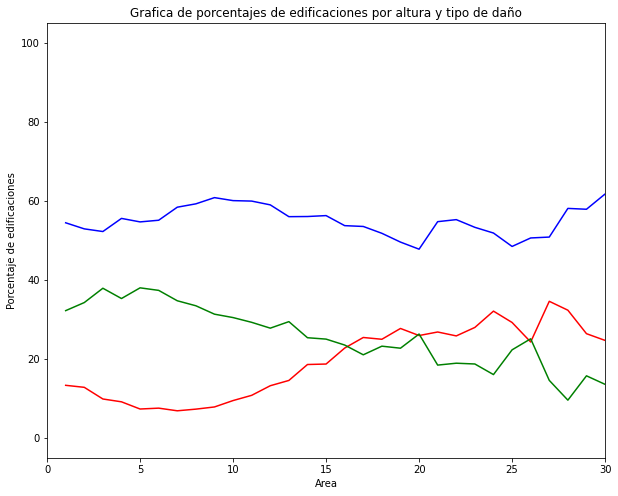

In [33]:
# Hacemos con relación entre area y daños


#df_filtrado     = df[df['height_percentage'] < 10]
df_filtrado     = df

# Agrupamos por daño y altura y contamos.
df_altura_daños = df_filtrado.groupby(['damage_grade','area_percentage']).agg({'age':['count']})
level_0         = df_altura_daños.columns.get_level_values(0)
level_1         = df_altura_daños.columns.get_level_values(1)
df_altura_daños.columns = level_0 + '_' + level_1
df_altura_daños.reset_index(inplace=True)

# Pivotamos
df_altura_daños_pivot = df_altura_daños.pivot('area_percentage','damage_grade','age_count').fillna(0)
df_altura_daños_pivot_aux = df_altura_daños_pivot.copy()

# Calculamos los porcentajes
df_altura_daños_pivot[1] = df_altura_daños_pivot_aux[1]/(df_altura_daños_pivot_aux[1]+df_altura_daños_pivot_aux[2]+df_altura_daños_pivot_aux[3])*100
df_altura_daños_pivot[2] = df_altura_daños_pivot_aux[2]/(df_altura_daños_pivot_aux[1]+df_altura_daños_pivot_aux[2]+df_altura_daños_pivot_aux[3])*100
df_altura_daños_pivot[3] = df_altura_daños_pivot_aux[3]/(df_altura_daños_pivot_aux[1]+df_altura_daños_pivot_aux[2]+df_altura_daños_pivot_aux[3])*100

# Reseteamos los indices
df_altura_daños_pivot['Area'] = df_altura_daños_pivot.index

# Hacemos el grafico
plt.figure(figsize=(10,8))
colores = ['red','blue','green']
for i in range(1,4):
  ax = plt.subplot(1,1,1)
  ax.plot(df_altura_daños_pivot['Area'],df_altura_daños_pivot[i],colores[i-1])
  ax.set_xlabel('Area')
  ax.set_ylabel('Porcentaje de edificaciones')
plt.xlim(0,30)
plt.title('Grafica de porcentajes de edificaciones por area y tipo de daño')

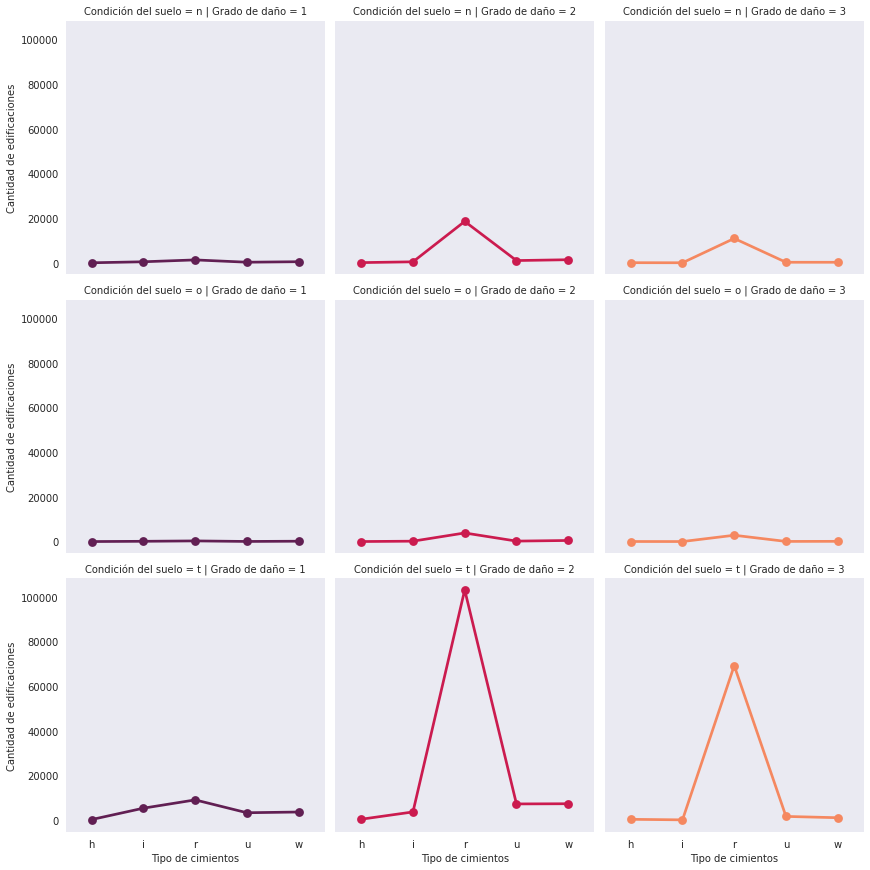

In [55]:
# Vamos a agrupar por tipos de cimientos
sns.set_style("dark")
grouped_cimiento_daño = df.groupby(['foundation_type','damage_grade','land_surface_condition']).agg({'age':['count']})
level_0               = grouped_cimiento_daño.columns.get_level_values(0)
level_1               = grouped_cimiento_daño.columns.get_level_values(1)
grouped_cimiento_daño.columns = level_0 + '_' + level_1
grouped_cimiento_daño.reset_index(inplace=True)
grouped_cimiento_daño.rename(columns={'damage_grade' : 'Grado de daño',
                                      'land_surface_condition' : 'Condición del suelo',
                                      'foundation_type' : 'Tipo de cimientos',
                                      'age_count' : 'Cantidad de edificaciones'},inplace=True)

g = sns.catplot(x="Tipo de cimientos",
                y="Cantidad de edificaciones",
                hue="Grado de daño",
                col="Grado de daño",
                row="Condición del suelo",
                palette="rocket", height=4,
                kind="point", data=grouped_cimiento_daño)
g.despine(left=True)

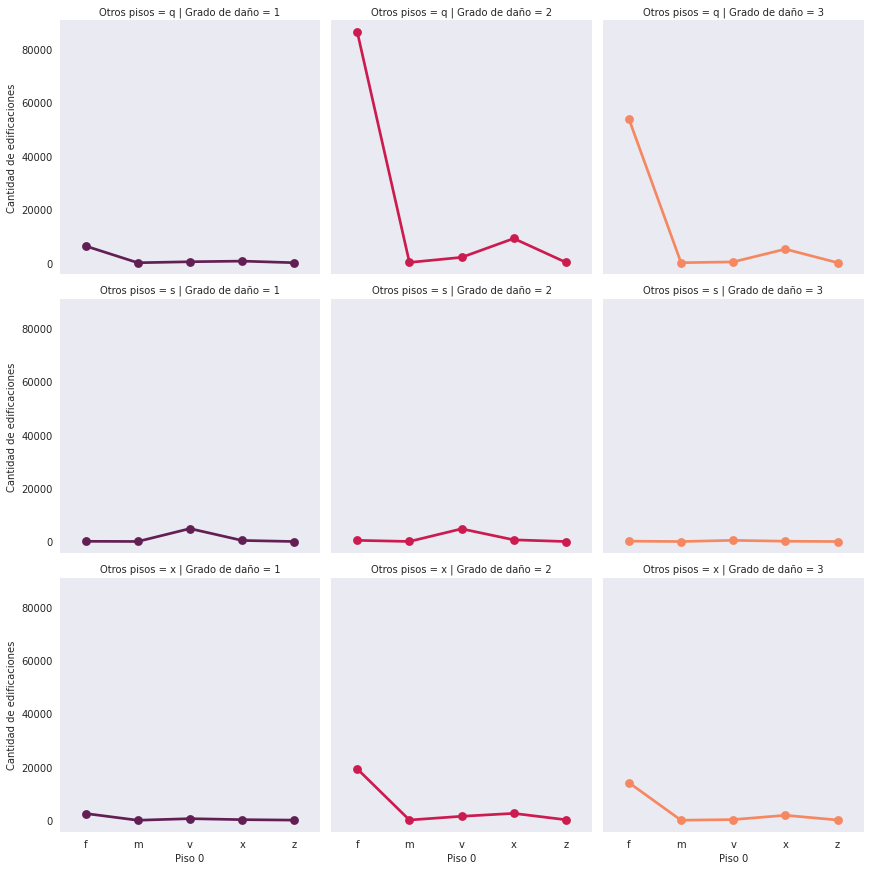

In [60]:
# Vamos a agrupar por tipos de construccion en planta y demas
sns.set_style("dark")
df_filtrado           = df[(df['count_floors_pre_eq'] > 1) & (df['other_floor_type'] != 'j')]
grouped_cimiento_daño = df_filtrado.groupby(['ground_floor_type','other_floor_type','damage_grade']).agg({'age':['count']})
level_0               = grouped_cimiento_daño.columns.get_level_values(0)
level_1               = grouped_cimiento_daño.columns.get_level_values(1)
grouped_cimiento_daño.columns = level_0 + '_' + level_1
grouped_cimiento_daño.reset_index(inplace=True)
grouped_cimiento_daño.rename(columns={'damage_grade' : 'Grado de daño',
                                      'ground_floor_type' : 'Piso 0',
                                      'other_floor_type' : 'Otros pisos',
                                      'age_count' : 'Cantidad de edificaciones'},inplace=True)

g = sns.catplot(x="Piso 0",
                y="Cantidad de edificaciones",
                hue="Grado de daño",
                col="Grado de daño",
                row="Otros pisos",
                palette="rocket", height=4,
                kind="point", data=grouped_cimiento_daño)
g.despine(left=True)
#daño planta bajo otros pisos

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1.0, 'Mapa de calor de tipos de edificios y daños recibidos')

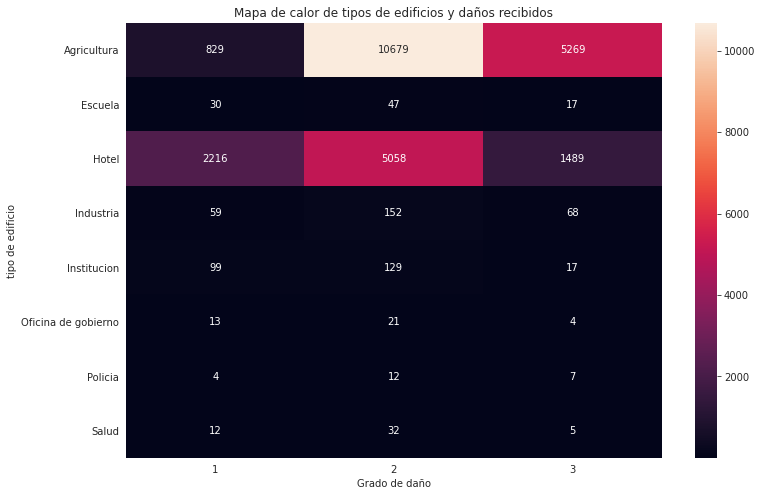

In [102]:
# Discriminamos por uso de los edificios, Edificios públicos

sns.set_style("dark")
df_mod = df
df_mod['has_secondary_use_health_post'].replace({1:'Salud',0:""},inplace = True)
df_mod['has_secondary_use_agriculture'].replace({1:'Agricultura',0:""},inplace = True)
df_mod['has_secondary_use_hotel'].replace({1:'Hotel',0:""},inplace = True)
df_mod['has_secondary_use_institution'].replace({1:'Institucion',0:""},inplace = True)
df_mod['has_secondary_use_school'].replace({1:'Escuela',0:""},inplace = True)
df_mod['has_secondary_use_industry'].replace({1:'Industria',0:""},inplace = True)
df_mod['has_secondary_use_gov_office'].replace({1:'Oficina de gobierno',0:""},inplace = True)
df_mod['has_secondary_use_use_police'].replace({1:'Policia',0:""},inplace = True)

#Fabricamos la columna tipo de edificio
df_mod['tipo de edificio'] = df_mod['has_secondary_use_health_post'] + \
df_mod['has_secondary_use_agriculture'] + df_mod['has_secondary_use_hotel'] + \
df_mod['has_secondary_use_institution'] + df_mod['has_secondary_use_school'] + \
df_mod['has_secondary_use_industry'] + df_mod['has_secondary_use_gov_office'] + \
df_mod['has_secondary_use_use_police']

#Filtro las vacias
df_mod = df_mod[df_mod['tipo de edificio'] != '']
df_mod.rename(columns={'damage_grade' : 'Grado de daño'},inplace=True)

df_mod = pd.crosstab(df_mod['tipo de edificio'],df_mod['Grado de daño'])
plt.figure(figsize=(12,8)) 
mapa_de_calor = sns.heatmap(df_mod,fmt='g', annot=True)
mapa_de_calor.set_title('Mapa de calor de tipos de edificios y daños recibidos')
